## Abstract:

The aim of this post was to create a model to maximize the gain on loans for a bank. This post demonstrates my ability to create visualizations in seaborn, choose featuers for my model, threshold my model, and analyze my model from the point of view of both the loaner and the borrower. 
My model uses the person's home ownership status, the percent of their income that the loan is, and the length of their most recent employment to predict whether or not the borrower defaulted on the loan. My model performs at 85 percent accuracy in the test data. I used a brute force tactic to choose these three features: iterating through every combination of features and fitting a logistic regression to each combination. I compared the mean cross validation scores for each combination and chose the three features with the highest score. 
I found the threshold that maximized gain for the bank by testing a wide range of values. I calculated the gain based on profit maximization by calculating the cost of a false negative and the gain of a true negative. I found that a threshold value of 1.086 maximized the banks profit with an average gain of 333 in the training data and 389 in the testing data.

## Part A: Grab the Data

In [337]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,MORTGAGE,8.0,EDUCATION,A,3000,7.29,0,0.02,N,17
26060,23,48000,RENT,1.0,VENTURE,A,4325,5.42,0,0.09,N,4
26061,22,60000,RENT,0.0,MEDICAL,B,15000,11.71,0,0.25,N,4
26062,30,144000,MORTGAGE,12.0,PERSONAL,C,35000,12.68,0,0.24,N,8


Downloading the training data

## Part B: Exploring the Data

/Users/tristanmeyer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Visualizing Loan Intent over Differing Loan Amounts'}, xlabel='Loan Amount', ylabel='Count'>

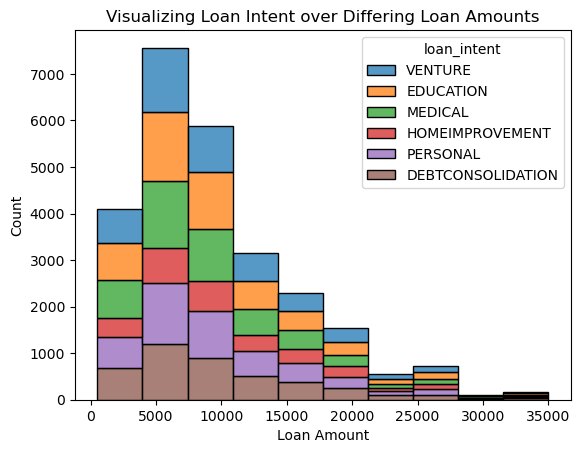

In [232]:
import seaborn as sns

df1 = df_train[["loan_intent", "loan_amnt"]]
df1 = df1.dropna()

p1 = sns.histplot(data=df1, x="loan_amnt", hue="loan_intent", multiple="stack", bins = 10)
p1.set(xlabel="Loan Amount", title="Visualizing Loan Intent over Differing Loan Amounts")
p1

This visualization shows a histogram of loan amounts shown over twenty bins separated by loan intent. Shown by the visualization, the majority of loans occur in the $5,000 - $15,000 range. Further, over the range of loan amounts, the proportions of the different loan intents stays relatively steady. 

/Users/tristanmeyer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tristanmeyer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Visualization Loan Interest Rates over Different Ages'}, xlabel='Ages', ylabel='Loan Interest Rates (%)'>

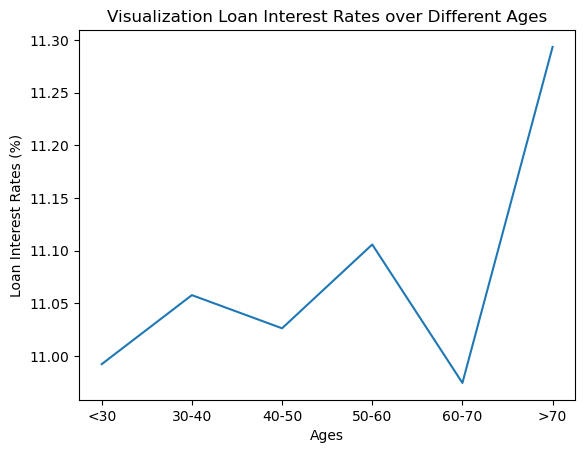

In [233]:
df2 = df_train[["person_age", "loan_int_rate"]]
df2 = df2.dropna()
df2['cat_age'] = np.select([df2.person_age < 30, df2.person_age < 40, df2.person_age < 50, df2.person_age < 60, df2.person_age < 70,], ['<30', '30-40','40-50','50-60','60-70'], '>70')
df2 = df2.groupby("cat_age", sort=False).aggregate('mean')

p2 = sns.lineplot(data=df2, x="cat_age", y = "loan_int_rate")
p2.set(xlabel ="Ages", ylabel = "Loan Interest Rates (%)", title ="Visualization Loan Interest Rates over Different Ages")
p2

To create this visualization, I created a new column that grouped the ages into ten year spans. Then, I aggregated the data frame by the mean values for the different categories in this new column. I then visualized this data over a line plot with the age categories on the x axis and the loan interest rates on the y axis. The graph shows a fluctuation between 11 to 11.1 for the ages up to 70 years old and then a jump to 11.3 for the loans given to people over 70.  

In [234]:
df3 = df_train[["person_age", "person_income", "person_home_ownership", "loan_amnt"]]
df3 = df3.dropna()
df3.groupby("person_home_ownership", sort=False).aggregate('mean')

,person_age,person_income,loan_amnt
person_home_ownership,,,
RENT,27.532802,54961.066515,8843.507973
MORTGAGE,28.005129,81076.729087,10562.137462
OWN,27.639462,57348.641383,8978.912626
OTHER,27.159091,78263.238636,11235.795455


This summary table shows the difference between the loan receivers age, income, and loan amount over the different home ownership statuses. The table shows that age remains relatively constant for all categories of home ownership. The table also shows an increased income for those with 'mortgage' and 'other' statuses compared to the 'rent' and 'own' statuses. The loan amount follows a similar pattern to the income, the 'mortgage' and 'other' statuses are greater than the 'rent' and 'own' statuses. 

## Part C: Build a Model

In [392]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def prepare_data(df):
  df = df.drop(["loan_grade"], axis = 1)
  df = df.dropna()
  y = df["loan_status"]
  df = df.drop(["loan_status"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(df_train)
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,27,98000,3.0,11750,13.47,0.12,6,False,False,False,True,False,True,False,False,False,False,False,True
2,22,36996,5.0,10000,7.51,0.27,4,False,False,False,True,False,True,False,False,False,False,True,False
3,24,26000,2.0,1325,12.87,0.05,4,False,False,False,True,False,False,False,True,False,False,True,False
4,29,53004,2.0,15000,9.63,0.28,10,True,False,False,False,False,False,True,False,False,False,True,False
6,21,21700,2.0,5500,14.91,0.25,2,False,False,False,True,False,False,True,False,False,False,True,False


Preparing the qualitative columns in the dataset and removing the loan status and loan grade columns. I also one hot encoded the categorical feature columns. 

In [397]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

all_quant_cols = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_percent_income", "cb_person_cred_hist_length"]
all_qual_cols = ["person_home_ownership","loan_intent","cb_person_default_on_file"]
max_cv_score = 0
max_cols = []
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    LR = LogisticRegression(max_iter=10000)
    LR.fit(X_train[cols], y_train)
    cv_scores = cross_val_score(LR,X_train[cols],y_train,cv = 10)
    cv_score_mean = cv_scores.mean()
    if cv_score_mean > max_cv_score:
      max_cv_score = cv_score_mean
      max_cols = cols
max_cols

['person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_emp_length',
 'loan_percent_income']

I split the features into the quantitative columns and the qualitative columns. Next, for every qualitative feature, I iterated through every combination of every possible number of quantitative features. For each of these combinations of one qualitative and different number of quantitative features, I fit a logistic regression model and calculated the mean cross evaluation score over ten folds. I found that a combination between two quantitative features performed just as well as combinations of three and four quantitative features and combinations of five and six quantitative features performed worse. Therefore, with two quantitative features and one qualitative feature the person's length of employment and the percent income that the loan is performed best as quantitative features and the person's home ownership status performed best out of the qualitative features.

In [296]:
max_cv_score

0.848212523277911

The maximum cross validation score produced (which used the features: person_home_ownership, person_emp_length, and loan_percent_income) a score of 0.85 accuracy. 

In [261]:
LR.fit(X_train[max_cols], y_train)
w = LR.coef_
w


array([[-0.14177704,  0.49223552, -1.20834042,  0.85823919, -0.01913409,
         8.28689689]])

Fitting a logistic regression with the max columns and found the weight vector of the model. 

## Part D: Find a Threshold

In [262]:
from sklearn.metrics import confusion_matrix

y_train_pred = LR.predict(X_train[max_cols])
C = confusion_matrix(y_train,y_train_pred, normalize = "true")
C

array([[0.98253712, 0.01746288],
       [0.64250914, 0.35749086]])

Showing a confusion matrix for the logistic regression model. 

In [322]:
def linear_score(X, w):
    return X@w

s = linear_score(X_train[max_cols], w[0])

for t in np.linspace(1,6,11):
    y_pred = s >= t
    acc = (y_pred == y_train).mean()
    print(f"A threshold of {t:.1f} gives an accuracy of {acc:.2f}.")

A threshold of 1.0 gives an accuracy of 0.47.
A threshold of 1.5 gives an accuracy of 0.60.
A threshold of 2.0 gives an accuracy of 0.72.
A threshold of 2.5 gives an accuracy of 0.80.
A threshold of 3.0 gives an accuracy of 0.84.
A threshold of 3.5 gives an accuracy of 0.84.
A threshold of 4.0 gives an accuracy of 0.81.
A threshold of 4.5 gives an accuracy of 0.80.
A threshold of 5.0 gives an accuracy of 0.79.
A threshold of 5.5 gives an accuracy of 0.79.
A threshold of 6.0 gives an accuracy of 0.79.


Finding a starting threshold that results in the highest accuracy. The threshold of 3.0 results in the highest accuracy. 

In [327]:
t = 3.0

avg_loan_amount = X_train["loan_amnt"].mean()
avg_loan_int_rate = X_train["loan_int_rate"].mean()/100
cost_of_FN = avg_loan_amount*(1 + 0.25*avg_loan_int_rate)**3 - 1.7*avg_loan_amount
gain_of_TN = avg_loan_amount*(1 + 0.25*avg_loan_int_rate)**10 - avg_loan_amount

# compute the scores
s     = linear_score(X_train[max_cols], w[0])
preds = s >= t

# compute error rates
FPR   = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
TPR   = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()

TNR = 1 - FPR
FNR = 1 - TPR

# compute the expected gain
gain = gain_of_TN*TNR  + cost_of_FN*FNR 
gain

-698.0432952112778

Calculating the gain based on profit maximization by calculating the cost of a false negative and the gain of a true negative. The gain on a true negative assumes that the profit earned by the bank on a 10-year loan is equal to 25% of the interest rate each year, with the other 75% of the interest going to things like salaries for the people who manage the bank. The cost of a false negative corresponds to the same profit-earning mechanism as above, but assumes that the borrower defaults three years into the loan and that the bank loses 70% of the principal. Using these formulas, and the threshold that maximized accuracy (3.0), the gain from the model is -698 dollars for each loan. 

In [398]:
num_thresholds = 101

FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)
T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s = linear_score(X_train[max_cols], w[0])

for i in range(num_thresholds):
    t = T[i]
    preds    = s >= t
    FPR[i]   = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i]   = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()

In order to find a threshold that maximizes gain, 101 thresholds are tried from the minimum value of the logistic regression to the maximum value. These different thresholds are stored in arrays recording their false positive and true positive rates. 

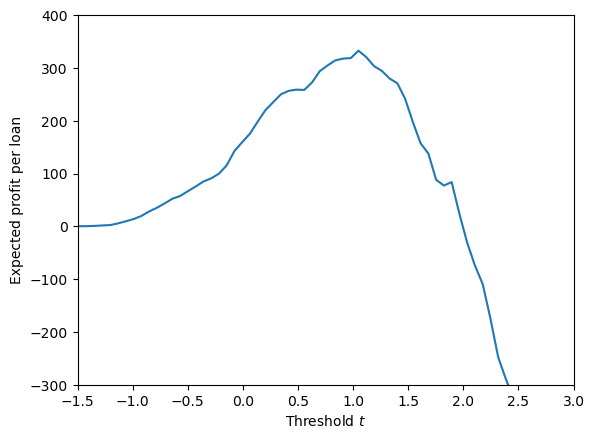

332.6396917244905

In [400]:
TNR = 1 - FPR
FNR = 1 - TPR

avg_loan_amount = X_train["loan_amnt"].mean()
avg_loan_int_rate = X_train["loan_int_rate"].mean()/100

cost_of_FN = avg_loan_amount*(1 + 0.25*avg_loan_int_rate)**3 - 1.7*avg_loan_amount
gain_of_TN = avg_loan_amount*(1 + 0.25*avg_loan_int_rate)**10 - avg_loan_amount

gain =  gain_of_TN*TNR  + cost_of_FN*FNR 

plt.plot(T, gain)
plt.gca().set(ylim = (-300, 400), xlim = (-1.5, 3))
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Expected profit per loan")
plt.show()

The false positive and true negative rates are used to calculate false negative and true negative values. The expected profit per loan is then calculated for each threshold and visualized on the line chart. 

In [394]:
ymax = gain.max()
xpos = np.where(gain == ymax)
xmax = T[xpos]
xmax

/var/folders/nr/wxklmm8n7v1986xxzzsjr73m0000gn/T/ipykernel_94626/2988660966.py:2: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  xpos = np.where(gain == ymax)


(array([-1.76658]), 389.3279923336545)

Finding the threshold with the maximum value using the .where function to find the index and then using that index to find the value in the threshold array. The threshold with the highest expected profit per loan is 1.086. 

In [330]:
t = 1.086

# compute the scores
s     = linear_score(X_train[max_cols], w[0])
preds = s >= t

# compute error rates
FPR   = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
TPR   = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()

TNR = 1 - FPR
FNR = 1 - TPR

# compute the expected gain
gain = gain_of_TN*TNR  + cost_of_FN*FNR 
gain

329.09965389194906

The gain for the threshold 1.086 results in a profit of 329 dollars expected profit per loan. This gain is significantly better than the 698 dollars estimated lost per loan when using a threshold that maximizes accuracy. 

## Part E: Evaluate Your Model from the Bank’s Perspective

In [287]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)

X_test, y_test = prepare_data(df_test)


Loading and preparing the test data.

In [331]:
t = 1.086

# compute the scores
s     = linear_score(X_test[max_cols], w[0])
preds = s >= t

# compute error rates
FPR   = ((preds == 1) & (y_test == 0)).sum() / (y_test == 0).sum()
TPR   = ((preds == 1) & (y_test == 1)).sum() / (y_test == 1).sum()

TNR = 1 - FPR
FNR = 1 - TPR

# compute the expected gain
gain = gain_of_TN*TNR  + cost_of_FN*FNR 
gain

389.3279923336545

The model with a threshold of 1.086 resulted in a 389 dollar expected gain per loan in the testing data. This profit is greater than the profit produced by the training set!

## Part F: Evaluate Your Model From the Borrower’s Perspective

Is it more difficult for people in certain age groups to access credit under your proposed system?

In [342]:
df4 = df_train[df_train['person_age'] < 40]
X_train, y_train = prepare_data(df4)


# compute the scores
s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
preds.mean()


0.6650836829729356

In [360]:
df5 = df_train[df_train['person_age'] > 40]
X_train, y_train = prepare_data(df5)

# compute the scores
s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
preds.mean()

0.6085271317829457

Although I didn't use age as a predictor in my logistic regression model, I found that in the training data, people under the age of 40 were able to receive a loan at a rate of 66%; whereas, people over the age of 40 were only able to receive a loan at a rate of 60%. This difference could be due to other predictors in my model, such as the person's employment length or home ownership status. 

Is it more difficult for people to get loans in order to pay for medical expenses? How does this compare with the actual rate of default in that group? What about people seeking loans for business ventures or education?

In [369]:
df6 = df_train[df_train['loan_intent'] == "MEDICAL"]
default_rate = df6["loan_status"].mean()
X_train, y_train = prepare_data(df6)

s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.7011848341232227
Percentage defaulted = 0.26328852119958635


In [374]:
df7 = df_train[df_train['loan_intent'] == "EDUCATION"]
default_rate = df7["loan_status"].mean()
X_train, y_train = prepare_data(df7)

s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.6729240282685512
Percentage defaulted = 0.17339574800078017


In [370]:
df8 = df_train[df_train['loan_intent'] == "VENTURE"]
default_rate = df8["loan_status"].mean()
X_train, y_train = prepare_data(df8)

s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.6247213277186029
Percentage defaulted = 0.14867793671434765


In [371]:
df9 = df_train[df_train['loan_intent'] == "HOMEIMPROVEMENT"]
default_rate = df9["loan_status"].mean()
X_train, y_train = prepare_data(df9)

s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.6076684740511231
Percentage defaulted = 0.26464507236388696


In [372]:
df10 = df_train[df_train['loan_intent'] == "PERSONAL"]
default_rate = df10["loan_status"].mean()
X_train, y_train = prepare_data(df10)

s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.6478473833462233
Percentage defaulted = 0.19373865698729584


In [373]:
df11 = df_train[df_train['loan_intent'] == "DEBTCONSOLIDATION"]
default_rate = df11["loan_status"].mean()
X_train, y_train = prepare_data(df11)

s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.6970773012838022
Percentage defaulted = 0.2874581139301101


Based on the training data, the intent category least likely to receive a loan was home improvement with 61% received. The intent category most likely to receive a loan was medical with 70% received. Interestingly, the venture intent category received only 62% of requests, but only had a default rate of 15%. 

How does a person’s income level impact the ease with which they can access credit under your decision system?

In [384]:
median = df_train["person_income"].median()
df12 = df_train[df_train['person_income'] < median]
default_rate = df12["loan_status"].mean()
X_train, y_train = prepare_data(df12)


# compute the scores
s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.7921593596507186
Percentage defaulted = 0.31125462707726237


In [386]:
median = df_train["person_income"].median()
df13 = df_train[df_train['person_income'] > median]
default_rate = df13["loan_status"].mean()
X_train, y_train = prepare_data(df13)


# compute the scores
s     = linear_score(X_train[max_cols], w[0])
preds = s >= t
print("Percentage given loans = " + str(preds.mean()))
print("Percentage defaulted = " + str(default_rate))

Percentage given loans = 0.5379828882551205
Percentage defaulted = 0.1302071302071302


Under my decision system, requestors with an income level above the median received loans at a rate of 53 percent. Compared to requestors with an income level below the median, who received loans at a rate of 79 percent. 

## Part G: Write and Reflect

Through the use of an exhaustive feature search and cross validation, I created a model that uses employment length, the percentage that the loan is compared to the borrower's income, and the home ownership status to predict if the loan will default with 86% accuracy in the training data. Further, I found a threshold value of 1.086 that maximized the banks profit with an average gain of 333 in the training data and 389 in the testing data.

Although I've worked with pandas dataframes and creating seaborn visualizations, this process was helpful practice for me. More importantly, this was my first implementation of a threshold to maximize gain. This post was helpful to my understanding of the concept as a whole and brought me through all the implementation steps. 

The concept of fairness is important to discuss when evaluating a model that decides who does and who doesn't receive loans. To reiterate, this model makes decisions purely to maximize gain without accounting for any other factors. The model made no attempt to adjust for social inequalities or other factors that would make it more just. However, in terms of fairness, which I classify as impartial decision making, given the intentions of the model, I think it performs in a fair manner. For example, considering people who are seeking loans for medical expenses have high rates of default, with intentions of pure gain, I think it is fair for a model to be less likely to give these people loans. This does not mean that it is morally right to not give these people loans, but considering their higher default rates, it is fair.   